## Carga de librerías necesarias y dataset


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)



## Exploración de datos 

In [34]:
df = pd.read_csv('data/atp_tennis.csv')
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

print("\nInformación del dataset:")
print(df.info())

print("\nDimensiones del dataset:", df.shape)



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65417 entries, 0 to 65416
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tournament  65417 non-null  object        
 1   Date        65417 non-null  datetime64[ns]
 2   Series      65417 non-null  object        
 3   Court       65417 non-null  object        
 4   Surface     65417 non-null  object        
 5   Round       65417 non-null  object        
 6   Best of     65417 non-null  int64         
 7   Player_1    65417 non-null  object        
 8   Player_2    65417 non-null  object        
 9   Winner      65417 non-null  object        
 10  Rank_1      65417 non-null  int64         
 11  Rank_2      65417 non-null  int64         
 12  Pts_1       65417 non-null  int64         
 13  Pts_2       65417 non-null  int64         
 14  Odd_1       65417 non-null  float64       
 15  Odd_2       65417 non-null  float64       
 

### Limpieza

In [35]:
# Valores Faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [36]:
limpieza=['Court', 'Series']
df.drop(columns=limpieza, inplace=True)
df = df.dropna()
print(df.columns)

Index(['Tournament', 'Date', 'Surface', 'Round', 'Best of', 'Player_1',
       'Player_2', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1',
       'Odd_2', 'Score'],
      dtype='object')


In [37]:
df_actual = df[df["Date"].dt.year > 2003]

In [38]:
#------- Mejora futura año tras año: Para filtrar ranking actual cambiar 2025----------

# Filtrar solo los partidos de 2025
df_2025 = df_actual[df_actual["Date"].dt.year == 2025]

# Juntar jugadores con sus rankings en 2025
players_1 = df_2025[["Player_1", "Rank_1"]].rename(columns={"Player_1": "Player", "Rank_1": "Rank"})
players_2 = df_2025[["Player_2", "Rank_2"]].rename(columns={"Player_2": "Player", "Rank_2": "Rank"})
ranking_2025 = pd.concat([players_1, players_2])

# Mantener solo el mejor ranking de cada jugador
ranking_2025 = ranking_2025.groupby("Player")["Rank"].min().reset_index()

# Filtrar top 200
top100_players = ranking_2025[ranking_2025["Rank"] <= 100]["Player"].unique()
top100_players = set(top100_players)

In [39]:
df_top100 = df_actual[
    (df_actual["Player_1"].isin(top100_players)) |
    (df_actual["Player_2"].isin(top100_players))
]
df_top100.to_csv("data/top100_actual.csv", index=False)



## Visualizaciones

C:\Users\Mayco\AppData\Local\Temp\ipykernel_10168\2070245410.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Victorias', y='Jugador', data=top_15_jugadores, palette='viridis')


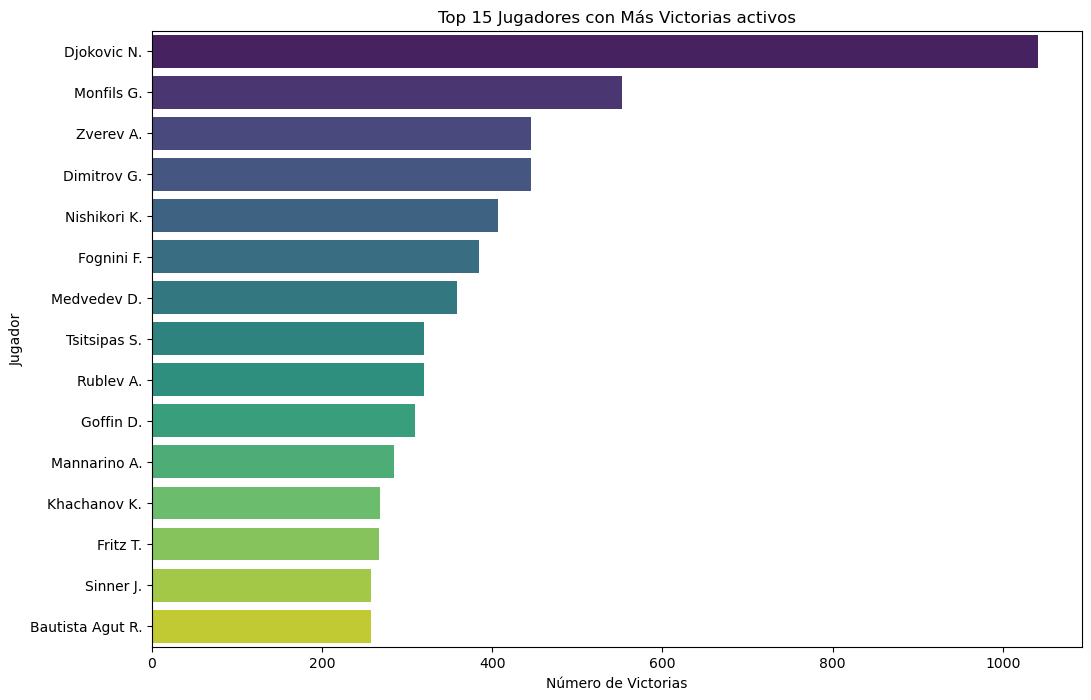

             Jugador  Victorias
0        Djokovic N.       1041
1         Monfils G.        552
2          Zverev A.        446
3        Dimitrov G.        445
4       Nishikori K.        407
5         Fognini F.        385
6        Medvedev D.        359
8       Tsitsipas S.        320
7          Rublev A.        320
9          Goffin D.        309
10      Mannarino A.        285
11      Khachanov K.        268
12          Fritz T.        267
13         Sinner J.        258
14  Bautista Agut R.        257


<Figure size 640x480 with 0 Axes>

In [40]:
# determianr que tenistas activos han cosechado mas victorias
victorias = df_top100['Winner'].value_counts().reset_index()
victorias.columns = ['Jugador', 'Victorias']

victorias = victorias.sort_values(by='Victorias', ascending=False)

top_15_jugadores = victorias.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Victorias', y='Jugador', data=top_15_jugadores, palette='viridis')
plt.title('Top 15 Jugadores con Más Victorias activos')
plt.xlabel('Número de Victorias')
plt.ylabel('Jugador')
plt.show()

print(top_15_jugadores)
plt.savefig('graficos/Jugadores_mas_victoriosos_activos.png')

C:\Users\Mayco\AppData\Local\Temp\ipykernel_10168\362686289.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Victorias', y='Jugador', data=top_15_jugadores, palette='viridis')


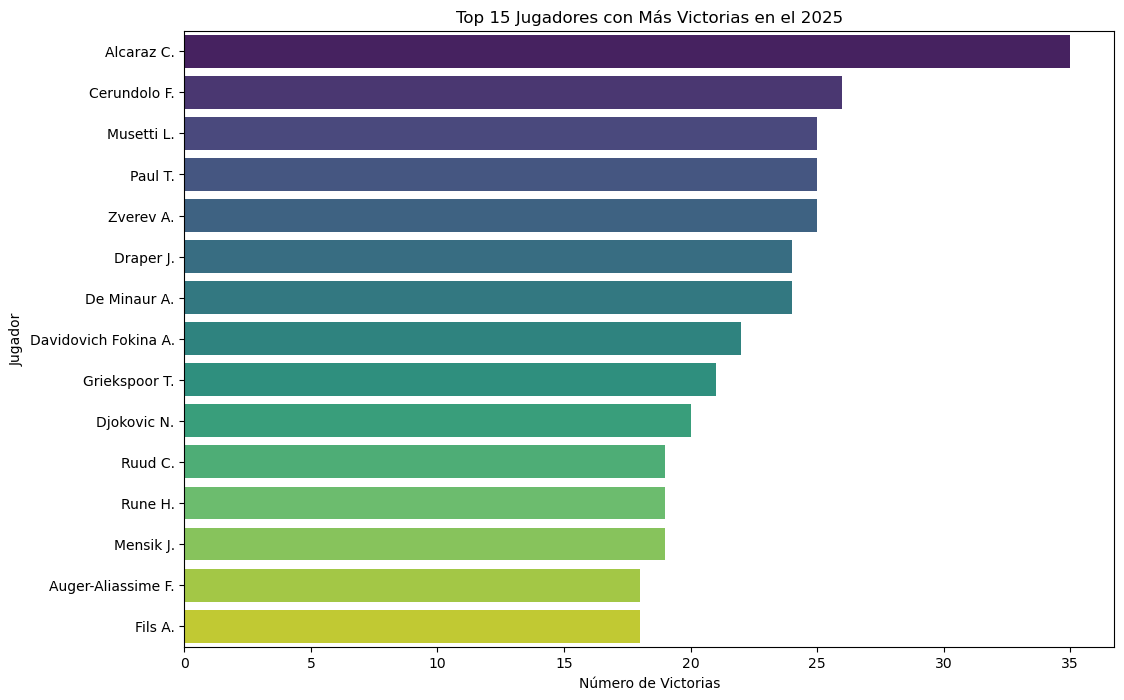

                 Jugador  Victorias
0             Alcaraz C.         35
1           Cerundolo F.         26
2             Musetti L.         25
3                Paul T.         25
4              Zverev A.         25
5              Draper J.         24
6           De Minaur A.         24
7   Davidovich Fokina A.         22
8          Griekspoor T.         21
9            Djokovic N.         20
10               Ruud C.         19
11               Rune H.         19
12             Mensik J.         19
13    Auger-Aliassime F.         18
14               Fils A.         18


<Figure size 640x480 with 0 Axes>

In [41]:
# determianr que tenistas han cosechado mas victorias en el presente año
victorias = df_2025['Winner'].value_counts().reset_index()
victorias.columns = ['Jugador', 'Victorias']

victorias = victorias.sort_values(by='Victorias', ascending=False)

top_15_jugadores = victorias.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Victorias', y='Jugador', data=top_15_jugadores, palette='viridis')
plt.title('Top 15 Jugadores con Más Victorias en el 2025')
plt.xlabel('Número de Victorias')
plt.ylabel('Jugador')
plt.show()

print(top_15_jugadores)
plt.savefig('graficos/Jugadores_mas_victoriosos_en_2025.png')

## Feature Engineering

In [42]:
df_top100['rank_diff'] = df_top100['Rank_1'] - df_top100['Rank_2']
df_top100['pts_diff'] = df_top100['Pts_1'] - df_top100['Pts_2']
df_top100['odds_diff'] = df_top100['Odd_1'] - df_top100['Odd_2']
df_top100['Ranking_Ganador'] = df_top100.apply(lambda row: row['Rank_1'] if row['Winner'] == row['Player_1'] else row['Rank_2'], axis=1)

df_top100['Gano_el_que_tenia_mas_puntos'] = df_top100.apply(
    lambda row: (row['Pts_1'] > row['Pts_2'] and row['Winner'] == row['Player_1']) or 
                (row['Pts_2'] > row['Pts_1'] and row['Winner'] == row['Player_2']), 
    axis=1
)

df_top100['Gano_el_que_tenia_menor_odd'] = df_top100.apply(
    lambda row: (row['Odd_1'] < row['Odd_2'] and row['Winner'] == row['Player_1']) or 
                (row['Odd_2'] < row['Odd_1'] and row['Winner'] == row['Player_2']), 
    axis=1
)


# Verificar las nuevas columnas
print(df_top100.head())

            Tournament       Date Surface      Round  Best of  \
13141     Croatia Open 2004-07-20    Clay  1st Round        3   
13527     Open Romania 2004-09-14    Clay  1st Round        3   
13544     Open Romania 2004-09-16    Clay  2nd Round        3   
13586    Thailand Open 2004-09-28    Hard  1st Round        3   
13767  Open de Moselle 2004-10-14    Hard  2nd Round        3   

                 Player_1     Player_2              Winner  Rank_1  Rank_2  \
13141         Djokovic N.  Volandri F.         Volandri F.     368      65   
13527          Clement A.  Djokovic N.         Djokovic N.      67     272   
13544           Ferrer D.  Djokovic N.           Ferrer D.      54     272   
13586  van Scheppingen D.  Djokovic N.  van Scheppingen D.      81     248   
13767         Patience O.   Monfils G.          Monfils G.     116     368   

       ...  Pts_2  Odd_1  Odd_2        Score rank_diff  pts_diff  odds_diff  \
13141  ...     -1   5.50   1.12      6-7 1-6       303       

In [43]:
#Profiling Report of ATP dataset, using ydata-profiling

#profile = ProfileReport(df,title="Ranking 100 atp matches")
#profile.to_file("clean_data_report/Atp.html")

## Encoding Variables categoricas

In [44]:
# Inicializar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Deja solo una columna (3 → 0, 5 → 1)

# Aplicar One-Hot Encoding
encoded_array = encoder.fit_transform(df_top100[['Best of']])

# Agregar la columna transformada al DataFrame
df_top100['Best of'] = encoded_array.astype(int)  # Convertir los valores flotantes a enteros

df_top100['Gano_el_que_tenia_mas_puntos'] = df_top100['Gano_el_que_tenia_mas_puntos'].astype(int)
df_top100['Gano_el_que_tenia_menor_odd'] = df_top100['Gano_el_que_tenia_menor_odd'].astype(int)



In [45]:
# Mapeo de valores para la variable Surface
surface_mapping = {'Hard': 2, 'Clay': 1, 'Grass': 0}

# Aplicar el mapeo a la columna Surface
df_top100['Surface'] = df_top100['Surface'].map(surface_mapping)

# Mostrar los primeros registros para verificar el cambio
print(df_top100[['Surface']].head())

       Surface
13141      1.0
13527      1.0
13544      1.0
13586      2.0
13767      2.0


In [46]:
# Crear una nueva variable de resultado binaria
df_top100['Winner_binary'] = (df_top100['Winner'] == df_top100['Player_1']).astype(int)

# Verificar la nueva variable
print(df_top100[['Player_1', 'Player_2', 'Winner', 'Winner_binary']].head())

# Eliminar la columna original Winner (opcional)
df_top100.drop(columns=['Winner'], inplace=True)

                 Player_1     Player_2              Winner  Winner_binary
13141         Djokovic N.  Volandri F.         Volandri F.              0
13527          Clement A.  Djokovic N.         Djokovic N.              0
13544           Ferrer D.  Djokovic N.           Ferrer D.              1
13586  van Scheppingen D.  Djokovic N.  van Scheppingen D.              1
13767         Patience O.   Monfils G.          Monfils G.              0


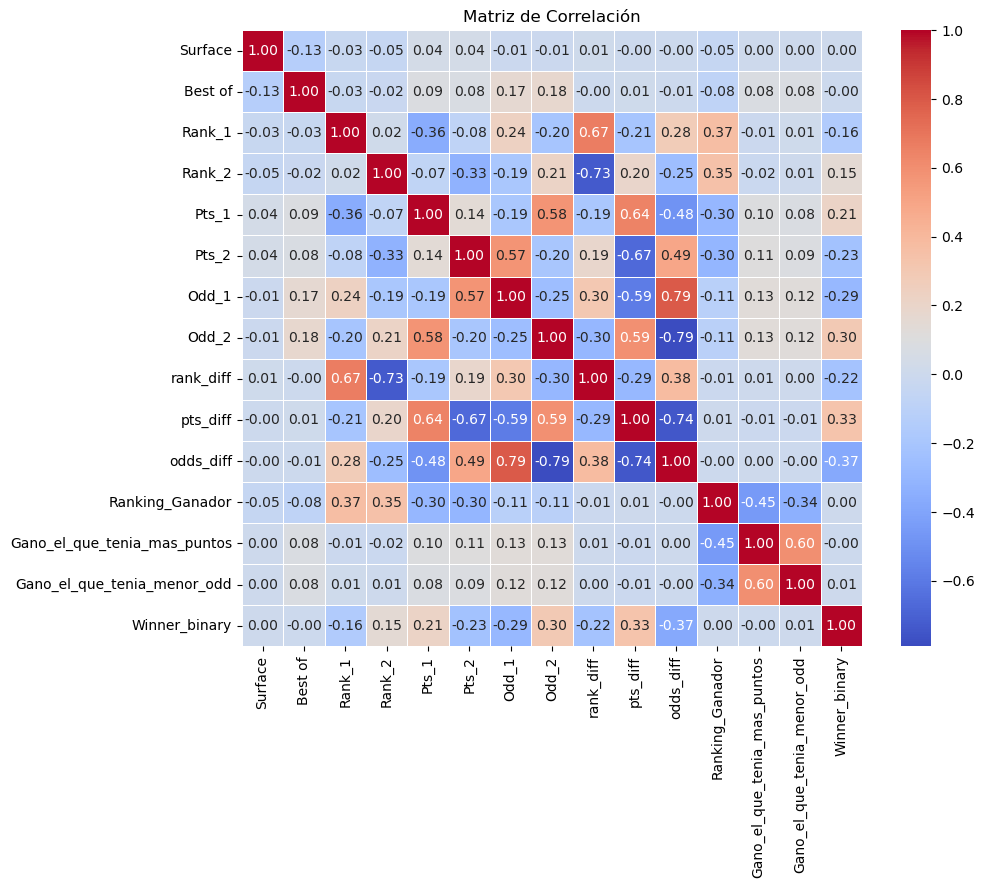

In [47]:
# Seleccionar solo columnas numéricas
df_numeric = df_top100.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [48]:
def plot_normality(data, variable):
    plt.figure(figsize=(12, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], kde=True, color='blue')
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # QQ Plot
    plt.subplot(1, 2, 2)
    sm.qqplot(data[variable], line='s', color='red')
    plt.title(f'QQ Plot de {variable}')
    
    plt.tight_layout()
    plt.show()

# Función para realizar pruebas de normalidad
def test_normality(data, variable):
    print(f"Pruebas de normalidad para {variable}:")
    
    # D’Agostino’s K²
    k2, p_value = stats.normaltest(data[variable])
    print(f"D’Agostino’s K²: estadístico = {k2:.2f}, p-value = {p_value:.4f}")
    
    # Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data[variable])
    print(f"Shapiro-Wilk: estadístico = {shapiro_stat:.2f}, p-value = {shapiro_p:.4f}")
    
    # Anderson-Darling
    anderson_result = stats.anderson(data[variable], dist='norm')
    print(f"Anderson-Darling: estadístico = {anderson_result.statistic:.2f}")
    for i in range(len(anderson_result.critical_values)):
        sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        if anderson_result.statistic < cv:
            print(f"Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"Al nivel de significancia {sl}%, los datos NO parecen normales.")

            
#variables = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']

#for var in variables:
    #plot_normality(df, var)
    #test_normality(df, var)

## Feature Scaling

In [49]:
df_top100[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 
          'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd', 'Winner_binary']]

,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Gano_el_que_tenia_mas_puntos,Gano_el_que_tenia_menor_odd,Winner_binary
13141,368,65,-1,-1,5.50,1.12,0,1,0
13527,67,272,-1,-1,1.53,2.35,0,0,0
13544,54,272,-1,-1,1.28,3.50,0,1,1
13586,81,248,-1,-1,1.61,2.20,0,1,1
13767,116,368,-1,-1,1.61,2.20,0,0,0
...,...,...,...,...,...,...,...,...,...
65412,2,12,8850,3210,1.08,8.00,1,1,1
65413,62,1,915,10380,17.00,1.03,1,1,0
65414,6,3,4230,7285,1.91,1.91,0,0,1
65415,6,1,4230,10380,4.33,1.22,1,1,0


In [50]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Surface', 'Best of', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'rank_diff', 'pts_diff', 'odds_diff', 'Ranking_Ganador', 'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd']
# Crear el escalador
scaler = StandardScaler()

# Aplicar la estandarización a las variables numéricas
df_top100[numeric_columns] = scaler.fit_transform(df_top100[numeric_columns])

# Verificar el resultado
print(df_top100[numeric_columns].head())

        Surface   Best of    Rank_1    Rank_2     Pts_1     Pts_2     Odd_1  \
13141 -0.720404 -0.502167  3.156587 -0.014511 -0.838989 -0.825984  0.907259   
13527 -0.720404 -0.502167  0.005012  1.985498 -0.838989 -0.825984 -0.401022   
13544 -0.720404 -0.502167 -0.131103  1.985498 -0.838989 -0.825984 -0.483407   
13586  0.771827 -0.502167  0.151597  1.753613 -0.838989 -0.825984 -0.374659   
13767  0.771827 -0.502167  0.518059  2.913039 -0.838989 -0.825984 -0.374659   

          Odd_2  rank_diff  pts_diff  odds_diff  Ranking_Ganador  \
13141 -0.534196   2.171648  0.006234   0.911588         0.215066   
13527 -0.126781  -1.469501  0.006234  -0.174170         3.421932   
13544  0.254135  -1.562680  0.006234  -0.466490         0.044653   
13586 -0.176466  -1.197132  0.006234  -0.126146         0.462940   
13767 -0.176466  -1.806379  0.006234  -0.126146         4.909175   

       Gano_el_que_tenia_mas_puntos  Gano_el_que_tenia_menor_odd  
13141                     -1.369648              

#### Establecer un baseline

In [51]:
df_top100['Ganó_el_que_tenia_ranking_mas_alto'] = df_top100.apply(lambda row: 1 if row['Rank_1'] < row['Rank_2'] else 0, axis=1)
accuracy_baseline = (df_top100['Ganó_el_que_tenia_ranking_mas_alto'] == df_top100['Winner_binary']).mean()
print(f"Accuracy del Baseline (Mejor Ranking): {accuracy_baseline:.2f}")

Accuracy del Baseline (Mejor Ranking): 0.65


## SMOTE - Balanceo de clases 


In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_top100[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Ranking_Ganador', 'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd', 'Ganó_el_que_tenia_ranking_mas_alto']]
y = df_top100['Winner_binary']

# Dividir los datos en entrenamiento y prueba (antes de aplicar SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el desbalance de clases en el conjunto de entrenamiento
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de aplicar SMOTE
print("\nDistribución de clases después de SMOTE:")
print(y_train_balanced.value_counts())

Distribución de clases antes de SMOTE:
Winner_binary
1    7402
0    7359
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Winner_binary
1    7402
0    7402
Name: count, dtype: int64


## Modelos

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Dividir los datos en conjuntos de entrenamiento y prueba
# Supongamos que X son las variables predictoras y y es la variable de resultado
X = df_top100[['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Ranking_Ganador', 'Gano_el_que_tenia_mas_puntos', 'Gano_el_que_tenia_menor_odd', 'Ganó_el_que_tenia_ranking_mas_alto']]
y = df_top100['Winner_binary']  # Variable de resultado (0 o 1)

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_balanced, y_train_balanced)

SGDClassifier(random_state=42)

In [55]:
# Hacer predicciones con SGDClassifier
y_pred_sgd = sgd.predict(X_test)

In [56]:
# Evaluar SGDClassifier
# Matriz de confusión
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
print("Matriz de Confusión - SGDClassifier:")
print(cm_sgd)

Matriz de Confusión - SGDClassifier:
[[1817   72]
 [ 798 1004]]


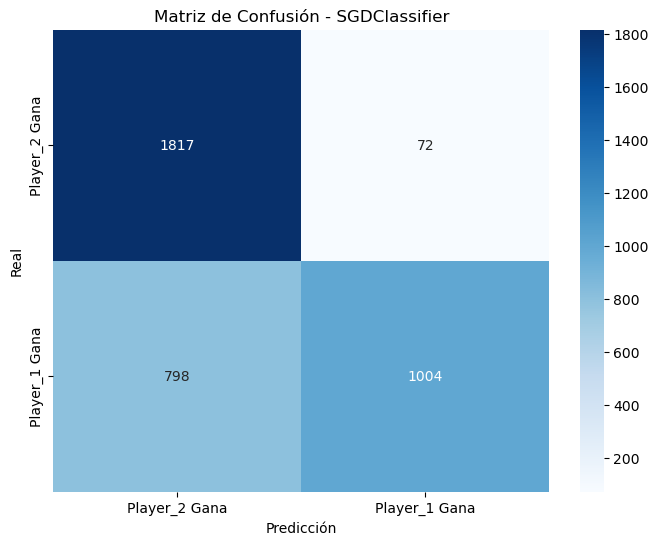

In [57]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', xticklabels=['Player_2 Gana', 'Player_1 Gana'], yticklabels=['Player_2 Gana', 'Player_1 Gana'])
plt.title('Matriz de Confusión - SGDClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [58]:
# Reporte de clasificación
print("\nReporte de Clasificación - SGDClassifier:")
print(classification_report(y_test, y_pred_sgd, target_names=['Player_2 Gana', 'Player_1 Gana']))


Reporte de Clasificación - SGDClassifier:
               precision    recall  f1-score   support

Player_2 Gana       0.69      0.96      0.81      1889
Player_1 Gana       0.93      0.56      0.70      1802

     accuracy                           0.76      3691
    macro avg       0.81      0.76      0.75      3691
 weighted avg       0.81      0.76      0.75      3691



#### KNN

In [59]:
# Entrenar el modelo KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(X_train_balanced, y_train_balanced)


KNeighborsClassifier(n_neighbors=1000)

In [60]:
# Hacer predicciones con KNeighborsClassifier
y_pred_knn = knn.predict(X_test)

In [61]:
# Evaluar KNeighborsClassifier
# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión - KNeighborsClassifier:")
print(cm_knn)

# Reporte de clasificación
print("\nReporte de Clasificación - KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn, target_names=['Player_2 Gana', 'Player_1 Gana']))

Matriz de Confusión - KNeighborsClassifier:
[[1849   40]
 [  38 1764]]

Reporte de Clasificación - KNeighborsClassifier:
               precision    recall  f1-score   support

Player_2 Gana       0.98      0.98      0.98      1889
Player_1 Gana       0.98      0.98      0.98      1802

     accuracy                           0.98      3691
    macro avg       0.98      0.98      0.98      3691
 weighted avg       0.98      0.98      0.98      3691



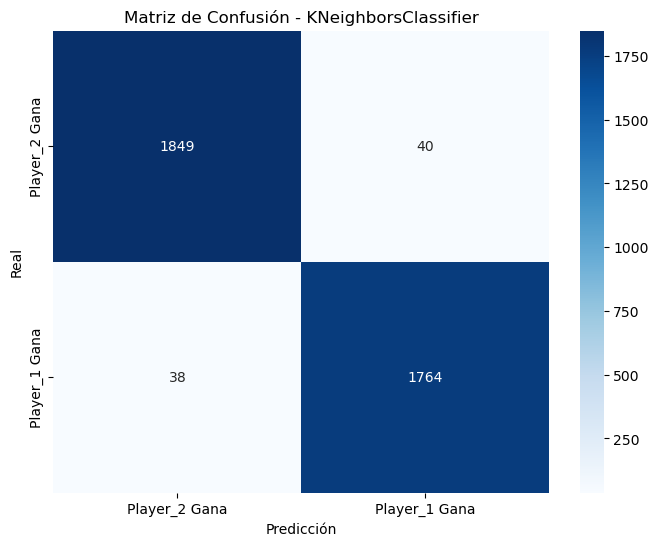

Exactitud de SGDClassifier: 0.76
Exactitud de KNeighborsClassifier: 0.98


In [62]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Player_2 Gana', 'Player_1 Gana'], yticklabels=['Player_2 Gana', 'Player_1 Gana'])
plt.title('Matriz de Confusión - KNeighborsClassifier')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Comparar la exactitud (accuracy) de ambos modelos
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Exactitud de SGDClassifier: {accuracy_sgd:.2f}")
print(f"Exactitud de KNeighborsClassifier: {accuracy_knn:.2f}")

### Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definir modelos
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.001, eta0=0.01, learning_rate='constant')
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Evaluar SGDClassifier con 5-Fold Cross Validation
cv_scores_sgd = cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy')
print("SGDClassifier - Accuracy promedio:", cv_scores_sgd.mean())

# Evaluar KNeighborsClassifier con 5-Fold Cross Validation
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("KNeighborsClassifier - Accuracy promedio:", cv_scores_knn.mean())

SGDClassifier - Accuracy promedio: 0.6675024113092469
KNeighborsClassifier - Accuracy promedio: 0.9950546135159964


In [65]:
import joblib
joblib.dump(knn, 'modelos/modelo_tenis.pkl')


['modelos/modelo_tenis.pkl']